In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

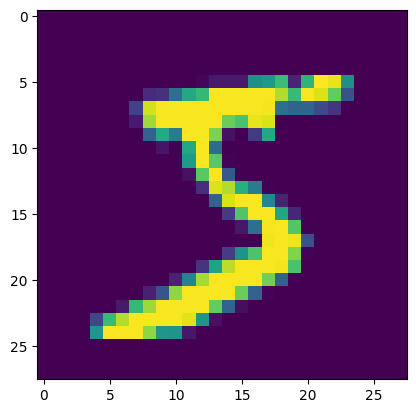

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

we need to standardize these xtrain and xtest

In [8]:
X_trainscaled=X_train/255
X_testscaled=X_test/255

In [9]:
X_trainscaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

1.using ANN

In [10]:
model1=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(500,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model1.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"]
)
model1.fit(X_trainscaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1776 - accuracy: 0.9447
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0791 - accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0546 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0422 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0345 - accuracy: 0.9891


In [11]:
model1.evaluate(X_testscaled,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0672 - accuracy: 0.9812


[0.06715229153633118, 0.9811999797821045]

We get 98 accuracy on test data using ANN

In [12]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model1.predict(X_testscaled)
ypred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report \n",classification_report(y_test,ypred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



for every class we get a good f1score

2. Using CNN

first we need to convert the images to 3D where 3 dimension represent color channel i will use 1 for gray 

In [13]:
X_trainscaled.shape

(60000, 28, 28)

In [14]:
X_traingray=X_trainscaled.reshape(60000,28,28,1)

In [15]:
X_testscaled.shape

(10000, 28, 28)

In [16]:
X_testgray=X_testscaled.reshape(10000,28,28,1)

In [17]:
X_traingray.shape

(60000, 28, 28, 1)

In [18]:
X_testgray.shape

(10000, 28, 28, 1)

In [19]:
model2=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=20,kernel_size=(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(500,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
])
model2.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"]
)
model2.fit(X_traingray,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1222 - accuracy: 0.9616
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0441 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0302 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0200 - accuracy: 0.9940


In [20]:
model2.evaluate(X_testgray,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0407 - accuracy: 0.9896


[0.04068243131041527, 0.9896000027656555]

here we get slightly better accuracy on test dataset than ANN 

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model2.predict(X_testgray)
ypred_classes=[np.argmax(element) for element in y_pred]
print("Classification report \n",classification_report(y_test,ypred_classes))

313/313 [==============================] - 3s 8ms/step
Classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



we can clearly see CNN is performing better

In [22]:
y_test[:15]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1], dtype=uint8)

In [23]:
ypred_classes[:15]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]

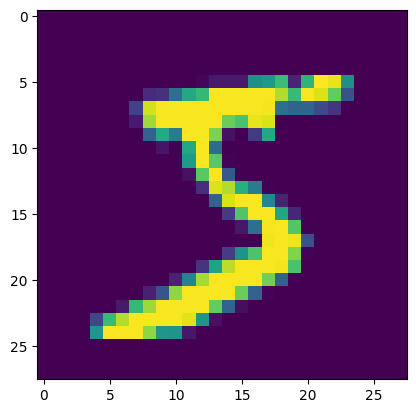

In [24]:
plt.imshow(X_traingray[0])

In [25]:
np.argmax(model2.predict(np.array([X_traingray[0]])))

1/1 [==============================] - 0s 24ms/step


5

we get correct prediction